In [81]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns 
import time as t
import random
from scipy.stats import iqr
from matplotlib.font_manager import FontProperties
from pandas.plotting import parallel_coordinates
import plotly.express as px
from sklearn.decomposition import PCA

In [38]:
environmental_indicators = [
    "Air Quality Index (AQI)",
    "Carbon Dioxide (CO2) Emissions",
    "Methane (CH4) Emissions",
    "Nitrous Oxide (N2O) Emissions",
    "Particulate Matter (PM2.5 and PM10)",
    "Ozone (O3) Concentration",
    "Water Quality Index (WQI)",
    "Biodiversity Index",
    "Deforestation Rate",
    "Soil Erosion Rate",
    "Waste Generation Rate",
    "Recycling Rate",
    "Energy Consumption",
    "Renewable Energy Usage",
    "Water Consumption",
    "Land Use Change"
]
mean_std_list = [(random.uniform(-100, 100), random.uniform(0.1, 50))
                 for _ in range(16)]

# 🎲 Generate a Random Matrix:

In [ ]:


def generate_matrix(rows: int, columns: int, distributions: list[tuple[float, float]] = None, global_mean_std: tuple[float, float] = None) -> np.ndarray:
    """
    Generates a matrix where each column follows a specified normal distribution.
    
    Parameters:
    rows (int): Number of rows in the matrix.
    columns (int): Number of columns in the matrix.
    distributions (list of tuples, optional): A list where each tuple contains (mean, std) for the normal distribution
                                              of the corresponding column. The length must match the number of columns.
    global_mean_std (tuple, optional): A single (mean, std) pair to be applied to all columns if distributions are not provided.
    
    Returns:
    np.ndarray: Generated matrix with specified distributions.
    """
    if global_mean_std:
        mean, std = global_mean_std
        return np.random.normal(loc=mean, scale=std, size=(rows, columns))

    if distributions is None or len(distributions) != columns:
        raise ValueError(
            "Number of distributions must match the number of columns or provide a global mean and std.")

    matrix = np.zeros((rows, columns))
    for col in range(columns):
        mean, std = distributions[col]
        matrix[:, col] = np.random.normal(loc=mean, scale=std, size=rows)

    return matrix


### 📌 Example:

In [40]:
# Example usage:
rows = 5
columns = 3
# Mean and std deviation for each column
specific_distributions = [(0, 1), (5, 2), (-3, 0.5)]
global_distribution = (2, 1)  # Apply same mean and std to all columns

# Using specific distributions

matrix1 = generate_matrix(rows, columns, distributions=specific_distributions)
print("Matrix with specific distributions:\n", matrix1)

# Using global mean and std
matrix2 = generate_matrix(rows, columns, global_mean_std=global_distribution)
print("\nMatrix with global distribution:\n", matrix2)

Matrix with specific distributions:
 [[ 0.40144801  3.3672305  -2.81365639]
 [-0.85744493  4.3864097  -3.39234976]
 [ 0.29035891  4.26625061 -3.73720849]
 [ 0.71416674  5.12391275 -2.91318045]
 [-0.18253984  2.97830311 -3.25947998]]

Matrix with global distribution:
 [[ 1.12005082  0.17032734  2.77858181]
 [ 0.31447431  2.77066426  2.9957192 ]
 [ 3.43910562  2.72832215  2.46235685]
 [ 3.51832897  2.6985414   3.03444884]
 [ 0.94528862  2.93219453 -0.94039832]]


# 🎲 Function to Generate Multiple Matrices with Customizable Storage and Distribution Options


In [41]:
from typing import List, Tuple, Dict, Union


def generate_matrices(num_matrices: int, rows: int, columns: int, storage_type: str = "array",
                      distributions: List[Tuple[float, float]] = None, global_mean_std: Tuple[float, float] = None) -> Union[List[np.ndarray], Dict[str, np.ndarray]]:
    """
    Generates multiple matrices and stores them in either a list (array) or a dictionary.
    
    Parameters:
    num_matrices (int): Number of matrices to generate.
    rows (int): Number of rows per matrix.
    columns (int): Number of columns per matrix.
    storage_type (str): Either "array" for a list or "dict" for a dictionary.
    distributions (List[Tuple[float, float]], optional): List of (mean, std) pairs for each column.
    global_mean_std (Tuple[float, float], optional): Single (mean, std) pair for all columns.
    
    Returns:
    Union[List[np.ndarray], Dict[str, np.ndarray]]: Generated matrices stored as a list or dictionary.
    """
    if storage_type not in ["array", "dict"]:
        raise ValueError("storage_type must be either 'array' or 'dict'")

    if storage_type == "array":
        return [generate_matrix(rows, columns, distributions, global_mean_std) for _ in range(num_matrices)]
    else:
        return {f"matrix_{i}": generate_matrix(rows, columns, distributions, global_mean_std) for i in range(num_matrices)}
    
    

### 📌 Example:

In [42]:
# Example usage:
num_matrices = 3
rows = 5
columns = 3
# Mean and std deviation for each column
specific_distributions = [(0, 1), (5, 2), (-3, 0.5)]
global_distribution = (2, 1)  # Apply same mean and std to all columns

# Generate list of matrices
matrix_list = generate_matrices(
    num_matrices, rows, columns, "array", specific_distributions)
print("List of Matrices:", matrix_list)

# Generate dictionary of matrices
matrix_dict = generate_matrices(
    num_matrices, rows, columns, "dict", global_mean_std=global_distribution)
print("\nDictionary of Matrices:", matrix_dict)

List of Matrices: [array([[-0.05862917,  0.27628757, -3.45615595],
       [-0.04438591,  2.61176116, -2.90484386],
       [-1.7128846 ,  4.59740332, -2.41066221],
       [-0.96967914,  7.57441538, -2.51322509],
       [ 0.63034646,  1.74086526, -3.97429356]]), array([[-0.90425297,  3.27939686, -3.14358185],
       [-0.46594901,  2.01416779, -2.52927458],
       [ 1.43920001,  5.33641033, -1.79532084],
       [ 2.23813835,  6.80055785, -3.30395958],
       [ 2.14303093,  4.86660346, -2.0066925 ]]), array([[ 0.71357278,  4.680592  , -3.50394957],
       [-0.55029891,  6.39767189, -3.76195368],
       [-0.2961057 ,  8.38629165, -3.23062717],
       [ 0.65350588,  6.15825342, -2.66176517],
       [-0.84690496,  5.09790351, -2.79655673]])]

Dictionary of Matrices: {'matrix_0': array([[0.73211261, 1.84165571, 1.56359788],
       [3.35144832, 1.91083119, 2.26271985],
       [1.22581139, 1.98876363, 1.05894629],
       [3.51022566, 3.13524553, 2.04808441],
       [2.04901002, 2.73555858, 1.892

In [43]:
import numpy as np

# Define environmental indicators
environmental_indicators = [
    "Air Quality Index (AQI)",
    "Carbon Dioxide (CO2) Emissions",
    "Methane (CH4) Emissions",
    "Nitrous Oxide (N2O) Emissions",
    "Particulate Matter (PM2.5 and PM10)",
    "Ozone (O3) Concentration",
    "Water Quality Index (WQI)",
    "Biodiversity Index",
    "Deforestation Rate",
    "Soil Erosion Rate",
    "Waste Generation Rate",
    "Recycling Rate",
    "Energy Consumption",
    "Renewable Energy Usage",
    "Water Consumption",
    "Land Use Change"
]

# Number of simulations
num_simulations = 1000

# Generate matrix for a bad environment house


def generate_bad_house_matrix(num_simulations, num_indicators):
    """
    Generate a matrix for a house with bad environmental performance.
    :param num_simulations: Number of simulations (int).
    :param num_indicators: Number of environmental indicators (int).
    :return: NumPy array of shape (num_simulations, num_indicators).
    """
    # Bad house: High emissions, low recycling, high waste, etc.
    matrix = np.zeros((num_simulations, num_indicators))

    # Set high values for negative indicators (e.g., emissions, waste)
    matrix[:, 1] = np.random.uniform(
        80, 100, num_simulations)  # CO2 Emissions (high)
    matrix[:, 2] = np.random.uniform(
        50, 70, num_simulations)   # CH4 Emissions (high)
    matrix[:, 3] = np.random.uniform(
        30, 50, num_simulations)   # N2O Emissions (high)
    matrix[:, 4] = np.random.uniform(
        60, 80, num_simulations)   # PM2.5 and PM10 (high)
    matrix[:, 10] = np.random.uniform(
        70, 90, num_simulations)  # Waste Generation (high)
    matrix[:, 12] = np.random.uniform(
        80, 100, num_simulations)  # Energy Consumption (high)
    matrix[:, 14] = np.random.uniform(
        60, 80, num_simulations)  # Water Consumption (high)

    # Set low values for positive indicators (e.g., recycling, renewable energy)
    matrix[:, 11] = np.random.uniform(
        10, 30, num_simulations)  # Recycling Rate (low)
    matrix[:, 13] = np.random.uniform(
        10, 30, num_simulations)  # Renewable Energy Usage (low)
    matrix[:, 7] = np.random.uniform(
        20, 40, num_simulations)   # Biodiversity Index (low)

    # Randomize other indicators
    for i in [0, 5, 6, 8, 9, 15]:
        matrix[:, i] = np.random.uniform(0, 100, num_simulations)

    return matrix

# Generate matrix for a good environment house


def generate_good_house_matrix(num_simulations, num_indicators):
    """
    Generate a matrix for a house with good environmental performance.
    :param num_simulations: Number of simulations (int).
    :param num_indicators: Number of environmental indicators (int).
    :return: NumPy array of shape (num_simulations, num_indicators).
    """
    # Good house: Low emissions, high recycling, low waste, etc.
    matrix = np.zeros((num_simulations, num_indicators))

    # Set low values for negative indicators (e.g., emissions, waste)
    matrix[:, 1] = np.random.uniform(
        10, 30, num_simulations)  # CO2 Emissions (low)
    matrix[:, 2] = np.random.uniform(
        5, 15, num_simulations)   # CH4 Emissions (low)
    matrix[:, 3] = np.random.uniform(
        2, 10, num_simulations)   # N2O Emissions (low)
    matrix[:, 4] = np.random.uniform(
        10, 20, num_simulations)  # PM2.5 and PM10 (low)
    matrix[:, 10] = np.random.uniform(
        10, 20, num_simulations)  # Waste Generation (low)
    matrix[:, 12] = np.random.uniform(
        20, 40, num_simulations)  # Energy Consumption (low)
    matrix[:, 14] = np.random.uniform(
        20, 40, num_simulations)  # Water Consumption (low)

    # Set high values for positive indicators (e.g., recycling, renewable energy)
    matrix[:, 11] = np.random.uniform(
        70, 90, num_simulations)  # Recycling Rate (high)
    # Renewable Energy Usage (high)
    matrix[:, 13] = np.random.uniform(70, 90, num_simulations)
    matrix[:, 7] = np.random.uniform(
        80, 100, num_simulations)  # Biodiversity Index (high)

    # Randomize other indicators
    for i in [0, 5, 6, 8, 9, 15]:
        matrix[:, i] = np.random.uniform(0, 100, num_simulations)

    return matrix

# Generate matrix for a random environment house


def generate_random_house_matrix(num_simulations, num_indicators):
    """
    Generate a matrix for a house with random environmental performance.
    :param num_simulations: Number of simulations (int).
    :param num_indicators: Number of environmental indicators (int).
    :return: NumPy array of shape (num_simulations, num_indicators).
    """
    # Random house: Random values for all indicators
    return np.random.uniform(0, 100, (num_simulations, num_indicators))


# Generate matrices
bad_house_matrix = generate_bad_house_matrix(
    num_simulations, len(environmental_indicators))
good_house_matrix = generate_good_house_matrix(
    num_simulations, len(environmental_indicators))
random_house_matrix = generate_random_house_matrix(
    num_simulations, len(environmental_indicators))

# Print shapes of the matrices
print("Bad House Matrix Shape:", bad_house_matrix.shape)
print("Good House Matrix Shape:", good_house_matrix.shape)
print("Random House Matrix Shape:", random_house_matrix.shape)

houses = [bad_house_matrix, good_house_matrix, random_house_matrix]
house_labels = ["Bad House", "Good House", "Random House"]

Bad House Matrix Shape: (1000, 16)
Good House Matrix Shape: (1000, 16)
Random House Matrix Shape: (1000, 16)


In [44]:
A = generate_matrix(10,10,global_mean_std=(3,2))
B = generate_matrix(10, 10, global_mean_std=(6, 0.9))
C = generate_matrix(10, 10, global_mean_std=(3, 0.9))
D = generate_matrix(10, 10, global_mean_std=(3, 0.9))

FACTORS = ["Water Usage",
           "Carbon Emissions",
           "Energy Consumption",
           "Material Waste",
           "Land Use",
           "Air Pollution",
           "Toxicity",
           "Resource depletion",
           "Eutrophication",
           "Acidification"]


# Robust testing
'''
Big_A = generate_matrix(10000, 10000, global_mean_std=(3, 0.9))
Big_B = generate_matrix(10000, 10000, global_mean_std=(3, 0.9))'
'''

"\nBig_A = generate_matrix(10000, 10000, global_mean_std=(3, 0.9))\nBig_B = generate_matrix(10000, 10000, global_mean_std=(3, 0.9))'\n"

In [45]:
A

array([[ 4.94611345,  4.60623877,  2.62048013,  5.35898005,  5.13984649,
         3.07909853,  4.96110398,  0.03405916,  0.88095133,  3.16524257],
       [ 5.20170627,  2.12718713,  2.9359448 ,  1.92104297,  2.67032425,
         2.15686023,  0.75243021,  4.39486541,  5.13842255,  1.71153674],
       [ 7.11523487,  5.31335148,  4.06019622,  2.03489247,  1.91065669,
         1.11636986, -0.6413259 ,  2.02269337,  1.20038075,  4.32289952],
       [ 7.18248691,  4.23923678,  0.75631887,  1.57383963,  3.36111431,
         2.1749517 ,  3.35667449,  7.68650144,  1.85099069,  0.10916588],
       [ 2.90820877,  2.96479176,  3.94954427,  3.06704265,  3.01750499,
         2.97608356,  2.45567094, -1.31419572,  3.65349137, -3.14027526],
       [ 4.36594066,  3.40069887,  2.73133308,  1.69913145,  4.06386846,
         2.61284863,  1.0799145 ,  4.47534486,  6.77434124,  4.77073826],
       [ 3.32585506,  1.68089229,  4.96920597,  3.62621178,  0.4706065 ,
         3.94537545,  1.74683449,  5.37989993

In [46]:
matrices = [generate_matrix(100, 16, distributions=mean_std_list)
            for i in range(3)]
matrices

[array([[ -3.59749078, -77.40327444,  87.54885016, ..., -63.0234019 ,
         -20.35723097,  -7.68637566],
        [  1.73463611, -88.433413  ,  90.81205168, ..., -68.78837139,
         -14.35019139,  -1.09956024],
        [ 32.05386537, -76.78926291,  88.83807583, ..., -80.1311978 ,
         -28.53943399,   4.43928234],
        ...,
        [-36.62867165, -81.07393913,  85.00030739, ..., -56.50116952,
         -30.38817301,  -5.83062663],
        [-13.32271779, -77.87633772,  90.55619591, ..., -56.57284301,
         -11.64359328, -15.19373882],
        [  9.40028179, -69.44315494,  85.46610685, ..., -77.9321963 ,
         -23.34672326,  -7.5365595 ]], shape=(100, 16)),
 array([[ 18.69661122, -70.91999688,  85.05459157, ..., -68.95620411,
         -33.66158369, -13.70421514],
        [  1.75696821, -84.74206873,  84.80102772, ..., -73.08165268,
         -34.59024997,  11.01905233],
        [ -9.31034883, -86.31030197,  88.79988756, ..., -50.17832543,
         -25.23086811,   3.4189688

## 🧮 Discernibility Analysis:

### 🧩 Simple code:

In [47]:
def DA_prim(A,B):
    N= len(A)
    if A.shape != B.shape or len(A)==0:
        raise ValueError("A and B should have the same dimensions & Matrices shouldn't be empty.")
    result=np.zeros(N)

    for j in range(N):
         counter=0
         for i in range(N):
             if A[i,j]-B[i,j]<0:
                 counter+=1
         result[j]=counter/N

    return result
                 
      

### 🏁 High level & Efficient code:

In [48]:
def Discernibility_Analysis(mat1: np.ndarray, mat2: np.ndarray) -> np.ndarray:


    if mat1.shape[1] != mat2.shape[1]:
         raise ValueError("Both matrices must have the same number of columns")
    
    return np.mean(mat1-mat2<0, axis=0)

### ✅ Test

In [49]:
DA_prim(A, B)

array([0.8, 1. , 1. , 1. , 1. , 1. , 0.9, 0.9, 0.9, 0.9])

In [50]:
Discernibility_Analysis(A,B)

array([0.8, 1. , 1. , 1. , 1. , 1. , 0.9, 0.9, 0.9, 0.9])

In [51]:
'''
start_time = t.time()
DA_prim(Big_A,Big_B)
end_time = t.time()

print(f"Execution time of DA_prim : {end_time - start_time} seconds\n")

start_time = t.time()
Discernibility_Analysis(Big_A,Big_B)
end_time = t.time()

print(
    f"Execution time of Discernibility_Analysis : {end_time - start_time} seconds\n")'
'''

'\nstart_time = t.time()\nDA_prim(Big_A,Big_B)\nend_time = t.time()\n\nprint(f"Execution time of DA_prim : {end_time - start_time} seconds\n")\n\nstart_time = t.time()\nDiscernibility_Analysis(Big_A,Big_B)\nend_time = t.time()\n\nprint(\n    f"Execution time of Discernibility_Analysis : {end_time - start_time} seconds\n")\'\n'

## 📊 Vizualisation of the Discernability Analysis

### Heatmap Color Palettes 🎨

Seaborn provides a variety of color palettes for heatmaps. Here are some popular ones and their use cases:

| Palette Name | Description | Example Use Case | Emoji Representation |
|--------------|-------------|------------------|----------------------|
| `"YlGnBu"`   | Yellow-Green-Blue gradient 🌈 | Default for discernibility analysis | 🟨🟩🟦 |
| `"viridis"`  | Perceptually uniform gradient 🌟 | Scientific data visualization | 🟣🔵🟢 |
| `"coolwarm"` | Blue-Red gradient 🔵🔴 | Highlighting contrasts in data | 🔵🔴 |
| `"RdYlBu"`   | Red-Yellow-Blue gradient 🌈 | Emphasizing diverging data | 🔴🟨🔵 |
| `"Greens"`   | Green gradient 🌿 | Environmental or sustainability data | 🟢 |
| `"Blues"`    | Blue gradient 💙 | Water-related or calm data | 🔵 |
| `"Reds"`     | Red gradient 🔥 | Highlighting risks or warnings | 🔴 |

Choose a palette that aligns with your data's context and the message you want to convey! 🎨✨

### 🔧 Functional Code:

In [52]:

from typing import List


def plot_discernibility_heatmap(
    matrices: List[np.ndarray],
    labels: List[str],
    factor_names: List[str],
    heatmap_theme: str = "viridis",
    annot_fontsize: int = 10,
    label_fontsize: int = 12,
    title_fontsize: int = 14,
    cell_padding: float = 0.1,
    colorbar_shrink: float = 0.8,
):
    """
    Plots a heatmap of discernibility analysis for multiple alternatives and factors.

    Parameters:
    matrices (List[np.ndarray]): List of matrices for each alternative (shape: n_samples x n_factors).
    labels (List[str]): List of labels for each alternative.
    factor_names (List[str]): List of names for each factor (e.g., water, carbon, material).
    heatmap_theme (str): Color palette for the heatmap. Default is "YlGnBu".
    annot_fontsize (int): Font size for annotations inside the heatmap cells. Default is 10.
    label_fontsize (int): Font size for axis labels. Default is 12.
    title_fontsize (int): Font size for the title. Default is 14.
    cell_padding (float): Padding between heatmap cells. Default is 0.1.
    colorbar_shrink (float): Shrink factor for the colorbar. Default is 0.8.
    """
    n_alternatives = len(matrices)
    n_factors = matrices[0].shape[1]

    # Initialize a matrix to store discernibility probabilities
    heatmap_data = np.zeros(
        (n_alternatives * (n_alternatives - 1) // 2, n_factors))

    # Fill the heatmap data
    row_labels = []
    idx = 0

    for i in range(n_alternatives):
        for j in range(i + 1, n_alternatives):
            row_labels.append(f"{labels[i]} > {labels[j]}")
            heatmap_data[idx, :] = Discernibility_Analysis(
                matrices[i], matrices[j])
            idx += 1

    # Dynamically adjust figure size based on heatmap dimensions
    # Adjust width based on number of factors
    fig_width = max(10, n_factors * 1.5)
    # Adjust height based on number of comparisons
    fig_height = max(6, len(row_labels) * 0.5)
    plt.figure(figsize=(fig_width, fig_height))

    # Plot the heatmap
    ax = sns.heatmap(
        heatmap_data,
        annot=True,
        fmt=".2f",
        cmap=heatmap_theme,
        xticklabels=factor_names,
        yticklabels=row_labels,
        annot_kws={"size": annot_fontsize},  # Customize annotation font size
        linewidths=cell_padding,  # Add padding between cells
        cbar_kws={"shrink": colorbar_shrink},  # Adjust colorbar size
    )

    # Customize axis labels and title
    plt.xlabel("Factors", fontsize=label_fontsize)
    plt.ylabel("Alternative Comparisons", fontsize=label_fontsize)
    plt.title("Discernibility Analysis Heatmap",
              fontsize=title_fontsize, pad=20)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha="right", fontsize=label_fontsize)
    plt.yticks(fontsize=label_fontsize)

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()

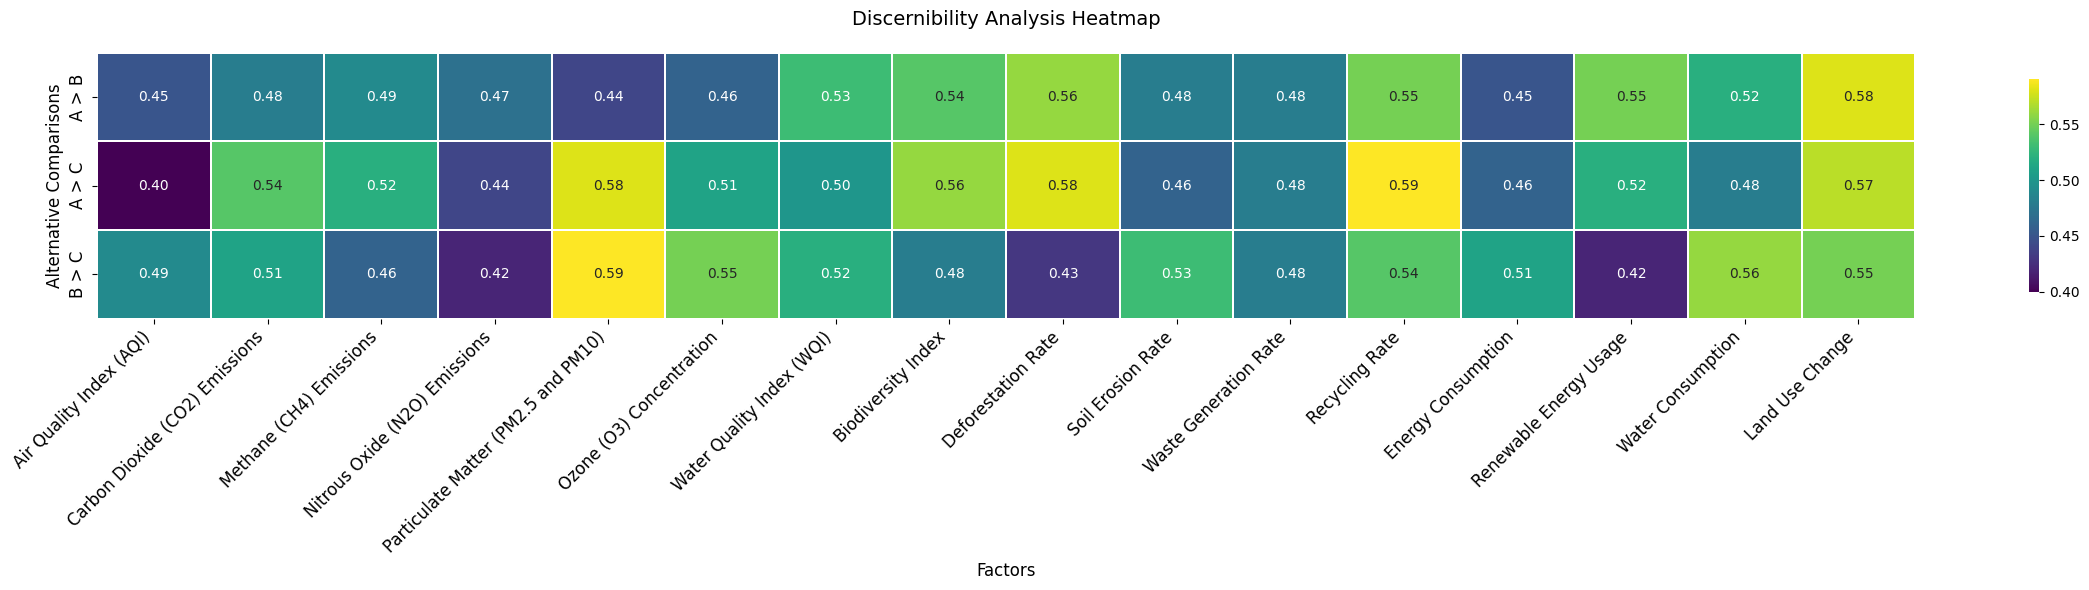

In [53]:
plot_discernibility_heatmap(matrices, ["A", "B", "C", "D"], environmental_indicators)

# 📱 **Radar Chart with Median and IQR**  

## **Function Overview**  
The `radar_chart_median_iqr` function creates a **radar chart** (also known as a spider chart) to visualize the **median** and **Interquartile Range (IQR)** of multiple matrices. This is useful for comparing different datasets across multiple factors.  

### **Function Parameters**  
| Parameter       | Type                | Description |
|---------------|-----------------|------------------|
| `matrices`    | `list of np.ndarray` | A list of matrices, where each matrix contains multiple samples and columns represent different factors. |
| `labels`      | `list` (optional)    | A list of labels for the factors (columns). If `None`, default labels (`Factor 1`, `Factor 2`, etc.) are used. |
| `matrix_names` | `list` (optional)    | Names for each matrix, used in the legend. If `None`, default names (`Matrix 1`, `Matrix 2`, etc.) are assigned. |
| `color_palette` | `list` (optional)   | A list of colors to differentiate matrices. If `None`, a default set of colors is used. |

---

## **How the Function Works**
1. Determines the number of **variables (columns)** in the matrices.
2. If labels are **not provided**, assigns default labels (`Factor 1`, `Factor 2`, etc.).
3. If `matrix_names` are **not provided**, assigns default names (`Matrix 1`, `Matrix 2`, etc.).
4. Computes **angles** for plotting the radar chart.
5. Loops through each matrix:
   - Computes the **median** and **IQR (Q1 and Q3)** for each column.
   - Plots the **median values** as a solid line.
   - Shades the **IQR region** (between Q1 and Q3).
6. Displays the radar chart with **labels, a title, and a legend**.

---

## **How to Control the Color Palette**
The `color_palette` parameter allows you to specify custom colors for each matrix. If **not provided**, the function defaults to:  
`['blue', 'green', 'red', 'purple', 'orange']`.  

### **Example Color Palette Options**
| Color List | Colors Used |
|------------|------------|
| `['blue', 'red', 'yellow']` | The first matrix is blue, the second is red, the third is yellow. |
| `['#FF5733', '#33FF57', '#3357FF']` | Uses **hex codes** for custom colors. |
| `plt.cm.viridis.colors[:5]` | Uses the first five colors from the **Viridis** colormap in Matplotlib. |

### **Example Usage**
```python
color_palette = ['#FF5733', '#33FF57', '#3357FF', '#F39C12', '#9B59B6']
radar_chart_median_iqr(matrices, labels=labels, matrix_names=matrix_names, color_palette=color_palette)
```

---

This function is useful for **comparing multiple datasets** on a single radar chart, making it easier to visualize trends and distributions across different factors. 🚀

In [54]:
def radar_chart_median_iqr(
    matrices,
    labels=None,
    matrix_names=None,
    color_palette=None,
    title="Radar Chart with Median and IQR",
    title_fontsize=20,
    label_fontsize=12,
    legend_fontsize=10,
    grid_color="lightgray",
    grid_alpha=0.5,
    linewidth=2,
    alpha_fill=0.3,
    background_alpha=0.1,
    label_rotation=45,
    legend_loc="upper right",
):
    """
    Creates a dynamic and visually appealing radar chart that visualizes the median and IQR of multiple matrices.

    Parameters:
        matrices (list of np.ndarray): List of matrices to visualize.
        labels (list): Labels for the factors (columns). If None, default labels are used.
        matrix_names (list): Names for each matrix (for the legend). If None, default names are used.
        color_palette (list): List of colors to use for each matrix. If None, a default palette is used.
        title (str): Title of the chart. Default is "Radar Chart with Median and IQR".
        title_fontsize (int): Font size for the title. Default is 20.
        label_fontsize (int): Font size for the axis labels. Default is 12.
        legend_fontsize (int): Font size for the legend. Default is 10.
        grid_color (str): Color of the grid lines. Default is "lightgray".
        grid_alpha (float): Transparency of the grid lines. Default is 0.5.
        linewidth (int): Line width for the median values. Default is 2.
        alpha_fill (float): Transparency of the IQR fill. Default is 0.3.
        background_alpha (float): Transparency of the background fill. Default is 0.1.
        label_rotation (float): Rotation angle for factor labels. Default is 45 degrees.
        legend_loc (str): Location of the legend. Default is "upper right".

    Returns:
        None (displays the radar chart).
    """
    # Number of variables (columns)
    num_vars = matrices[0].shape[1]

    # Create labels if not provided
    if labels is None:
        labels = [f"Factor {i+1}" for i in range(num_vars)]

    # Create matrix names if not provided
    if matrix_names is None:
        matrix_names = [f"Matrix {i+1}" for i in range(len(matrices))]

    # Use default color palette if not provided
    if color_palette is None:
        color_palette = [
            "#4E9F3D",  # Fresh Green (represents nature and growth)
            "#1E5128",  # Forest Green (represents forests and sustainability)
            "#3E7C17",  # Leaf Green (represents plants and renewal)
            "#206A5D",  # Teal Green (represents water and balance)
            "#81B214",  # Olive Green (represents earth and harmony)
            "#41644A",  # Moss Green (represents stability and grounding)
            "#D8E9A8",  # Light Green (represents freshness and energy)
            "#2C786C",  # Ocean Green (represents oceans and life)
            "#FFD700",  # Gold (represents energy and innovation)
            "#A3D2CA",  # Soft Aqua (represents clean air and water)
        ]

    # Compute angles for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # Close the loop for the radar chart
    angles += angles[:1]

    # Dynamically adjust figure size based on the number of factors
    # Adjust width based on number of factors
    fig_size = max(8, num_vars * 0.8)
    fig, ax = plt.subplots(figsize=(fig_size, fig_size),
                           subplot_kw=dict(polar=True))

    # Customize the grid and axis
    ax.spines["polar"].set_visible(False)  # Remove the outer spine
    ax.grid(color=grid_color, alpha=grid_alpha, linestyle="--", linewidth=0.5)
    ax.set_yticklabels([])  # Remove radial tick labels for cleaner look

    # Add a background fill for better contrast
    ax.fill(angles, [1] * len(angles), color="gray", alpha=background_alpha)

    # Plot each matrix
    for idx, matrix in enumerate(matrices):
        # Calculate median and IQR for the matrix
        median_values = np.median(matrix, axis=0)
        q1 = np.percentile(matrix, 25, axis=0)  # 25th percentile (Q1)
        q3 = np.percentile(matrix, 75, axis=0)  # 75th percentile (Q3)

        # Close the loop for the radar chart
        median_values = np.concatenate((median_values, [median_values[0]]))
        q1 = np.concatenate((q1, [q1[0]]))
        q3 = np.concatenate((q3, [q3[0]]))

        # Plot the median values
        ax.plot(
            angles,
            median_values,
            color=color_palette[idx % len(color_palette)],
            linewidth=linewidth,
            label=matrix_names[idx],
        )

        # Plot the IQR (shaded region between Q1 and Q3)
        ax.fill_between(
            angles,
            q1,
            q3,
            color=color_palette[idx % len(color_palette)],
            alpha=alpha_fill,
        )

    # Add labels with rotation for better readability
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=label_fontsize,
                       rotation=label_rotation, ha="center")

    # Add a title
    plt.title(title, size=title_fontsize, pad=20)

    # Add a legend with custom styling
    legend = ax.legend(
        loc=legend_loc,
        bbox_to_anchor=(1.1, 1.1),
        fontsize=legend_fontsize,
        frameon=True,
        edgecolor="black",
        facecolor="white",
        framealpha=0.8,
    )
    legend.set_title("Matrices", prop={
                     "size": legend_fontsize, "weight": "bold"})

    # Adjust layout for better spacing
    plt.tight_layout()

    # Show the chart
    plt.show()

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties


def radar_chart_median_iqr(
    matrices,
    labels=None,
    matrix_names=None,
    color_palette=None,
    title="Radar Chart with Median and IQR",
    title_fontsize=20,
    label_fontsize=12,
    legend_fontsize=10,
    grid_color="lightgray",
    grid_alpha=0.5,
    linewidth=2,
    alpha_fill=0.3,
    background_alpha=0.1,
    label_rotation=45,
    legend_loc="upper right",
):
    """
    Creates a dynamic and visually appealing radar chart that visualizes the median, mean, and IQR of multiple matrices.

    Parameters:
        matrices (list of np.ndarray): List of matrices to visualize.
        labels (list): Labels for the factors (columns). If None, default labels are used.
        matrix_names (list): Names for each matrix (for the legend). If None, default names are used.
        color_palette (list): List of colors to use for each matrix. If None, a default palette is used.
        title (str): Title of the chart. Default is "Radar Chart with Median and IQR".
        title_fontsize (int): Font size for the title. Default is 20.
        label_fontsize (int): Font size for the axis labels. Default is 12.
        legend_fontsize (int): Font size for the legend. Default is 10.
        grid_color (str): Color of the grid lines. Default is "lightgray".
        grid_alpha (float): Transparency of the grid lines. Default is 0.5.
        linewidth (int): Line width for the median and mean values. Default is 2.
        alpha_fill (float): Transparency of the IQR fill. Default is 0.3.
        background_alpha (float): Transparency of the background fill. Default is 0.1.
        label_rotation (float): Rotation angle for factor labels. Default is 45 degrees.
        legend_loc (str): Location of the legend. Default is "upper right".

    Returns:
        None (displays the radar chart).
    """
    # Number of variables (columns)
    num_vars = matrices[0].shape[1]

    # Create labels if not provided
    if labels is None:
        labels = [f"Factor {i+1}" for i in range(num_vars)]

    # Create matrix names if not provided
    if matrix_names is None:
        matrix_names = [f"Matrix {i+1}" for i in range(len(matrices))]

    # Use default color palette if not provided
    if color_palette is None:
        color_palette = [
            "#4E9F3D",  # Fresh Green
            "#FFD700",  # Gold (Yellowish)
            "#2C786C",  # Ocean Green
            "#FFA500",  # Orange (Yellowish)
            "#1E5128",  # Forest Green
            "#87CEEB",  # Sky Blue (Blueish)
            "#81B214",  # Olive Green
            "#A3D2CA",  # Soft Aqua (Blueish)
            "#3E7C17",  # Leaf Green
            "#41644A",  # Moss Green
        ]

    # Compute angles for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # Close the loop for the radar chart
    angles += angles[:1]

    # Dynamically adjust figure size based on the number of factors
    # Adjust width based on number of factors
    fig_size = max(8, num_vars * 0.8)
    fig, ax = plt.subplots(figsize=(fig_size, fig_size),
                           subplot_kw=dict(polar=True))

    # Customize the grid and axis
    ax.spines["polar"].set_visible(False)  # Remove the outer spine
    ax.grid(color=grid_color, alpha=grid_alpha, linestyle="--", linewidth=0.5)
    ax.set_yticklabels([])  # Remove radial tick labels for cleaner look

    # Add a background fill for better contrast
    ax.fill(angles, [1] * len(angles), color="gray", alpha=background_alpha)

    # Plot each matrix
    for idx, matrix in enumerate(matrices):
        # Calculate median, mean, and IQR for the matrix
        median_values = np.median(matrix, axis=0)
        mean_values = np.mean(matrix, axis=0)
        q1 = np.percentile(matrix, 25, axis=0)  # 25th percentile (Q1)
        q3 = np.percentile(matrix, 75, axis=0)  # 75th percentile (Q3)

        # Close the loop for the radar chart
        median_values = np.concatenate((median_values, [median_values[0]]))
        mean_values = np.concatenate((mean_values, [mean_values[0]]))
        q1 = np.concatenate((q1, [q1[0]]))
        q3 = np.concatenate((q3, [q3[0]]))

        # Plot the median values
        ax.plot(
            angles,
            median_values,
            color=color_palette[idx % len(color_palette)],
            linewidth=linewidth,
            label=f"{matrix_names[idx]} (Median)",
        )

        # Plot the mean values
        ax.plot(
            angles,
            mean_values,
            color=color_palette[idx % len(color_palette)],
            linewidth=linewidth,
            linestyle="--",
            label=f"{matrix_names[idx]} (Mean)",
        )

        # Plot the IQR (shaded region between Q1 and Q3)
        ax.fill_between(
            angles,
            q1,
            q3,
            color=color_palette[idx % len(color_palette)],
            alpha=alpha_fill,
        )

    # Add labels with rotation for better readability
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=label_fontsize,
                       rotation=label_rotation, ha="center")

    # Add a title with padding
    plt.title(title, size=title_fontsize, pad=30)

    # Add a legend with custom styling
    legend = ax.legend(
        loc=legend_loc,
        bbox_to_anchor=(1.1, 1.1),
        fontsize=legend_fontsize,
        frameon=True,
        edgecolor="black",
        facecolor="white",
        framealpha=0.8,
    )
    legend.set_title("Matrices", prop={
                     "size": legend_fontsize, "weight": "bold"})

    # Adjust layout for better spacing
    plt.tight_layout()

    # Show the chart
    plt.show()

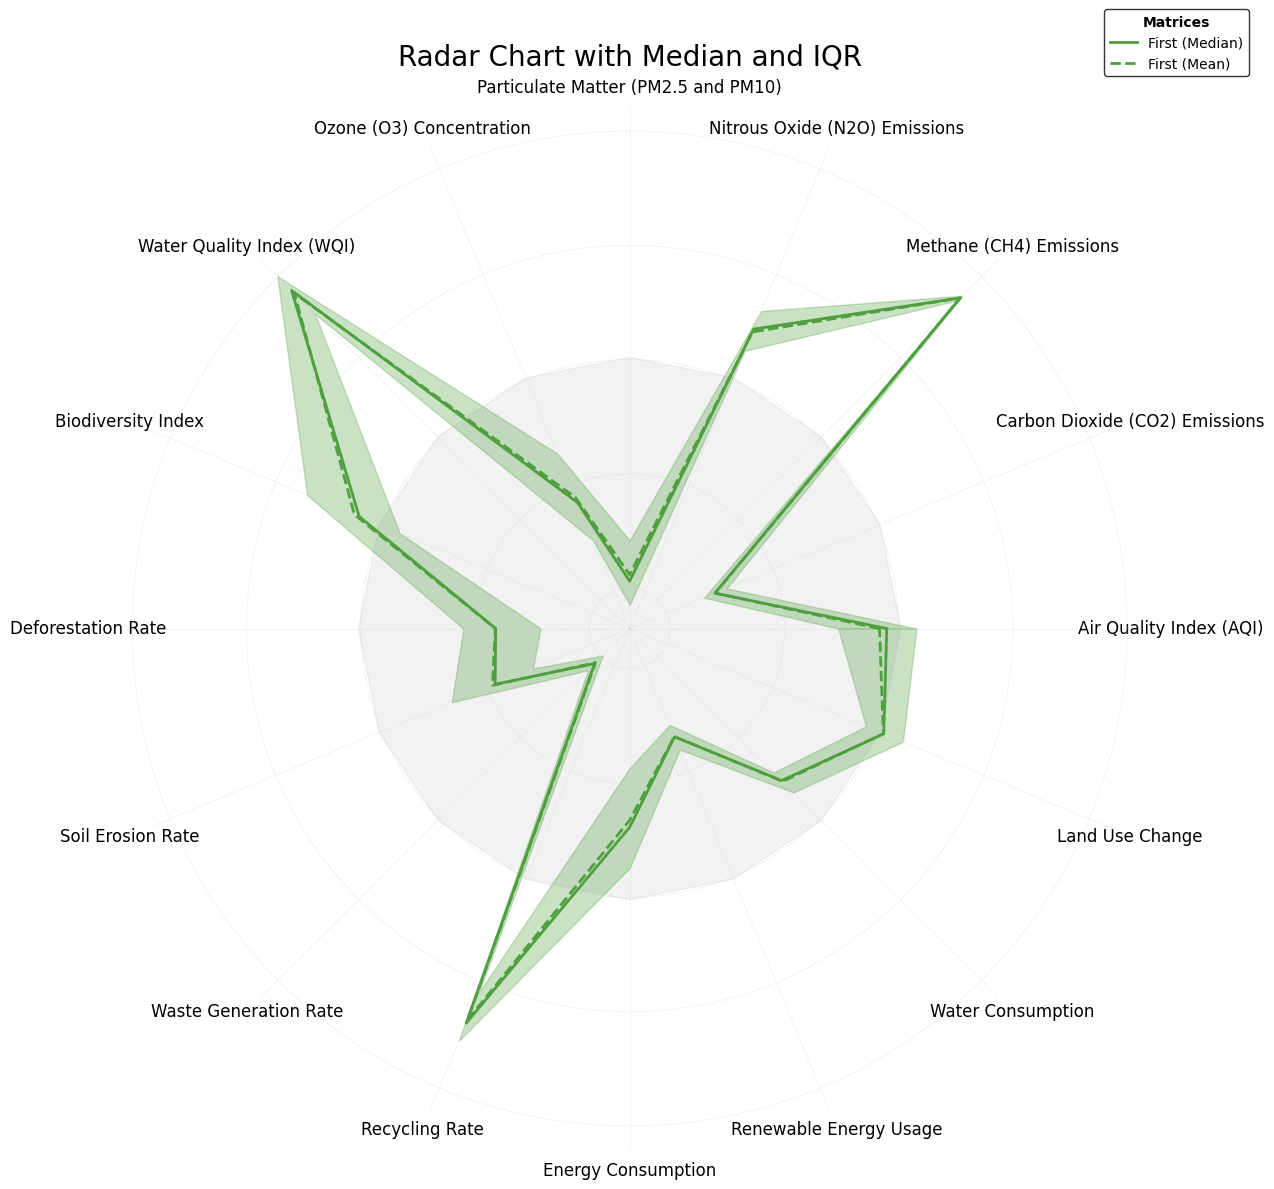

In [56]:
color_palette = [
    "#4E9F3D",  # Fresh Green (represents nature and growth)
    "#1E5128",  # Forest Green (represents forests and sustainability)
    "#3E7C17",  # Leaf Green (represents plants and renewal)
    "#206A5D",  # Teal Green (represents water and balance)
    "#81B214",  # Olive Green (represents earth and harmony)
    "#41644A",  # Moss Green (represents stability and grounding)
    "#D8E9A8",  # Light Green (represents freshness and energy)
    "#2C786C",  # Ocean Green (represents oceans and life)
    "#FFD700",  # Gold (represents energy and innovation)
    "#A3D2CA",  # Soft Aqua (represents clean air and water)
]
radar_chart_median_iqr(matrices=[matrices[0]], labels=environmental_indicators, matrix_names=["First"])

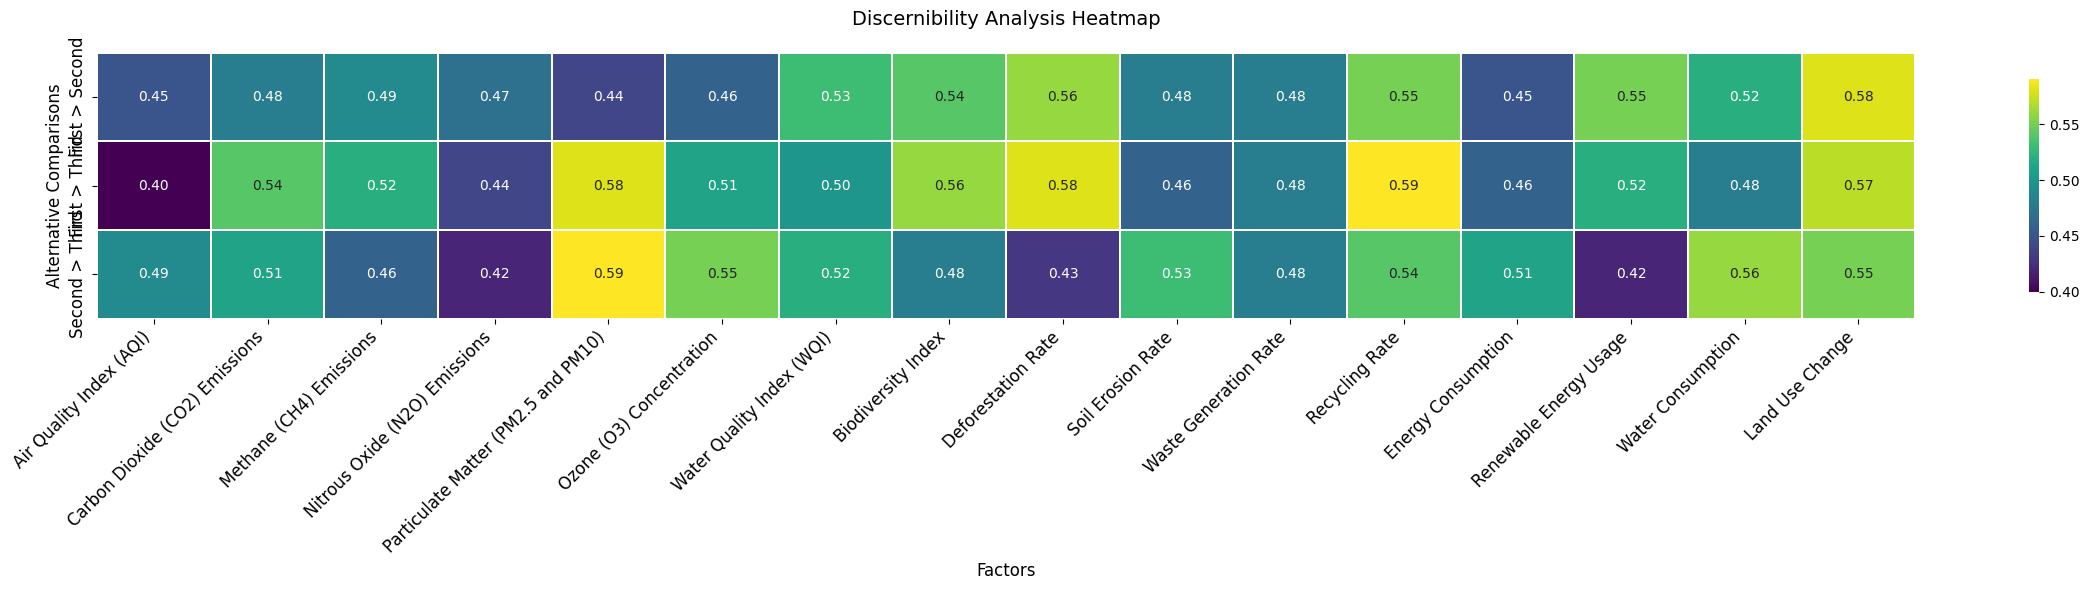

In [57]:
plot_discernibility_heatmap(matrices=matrices,
                            labels=["First", "Second", "Third"],
                            factor_names=environmental_indicators,heatmap_theme="viridis")



# 📊 Ranking Probabilities Analysis Functions

## 🔍 Overview
In this section, we introduce several functions designed to analyze and visualize the ranking probabilities of different matrices. These functions help in understanding the relative performance of various alternatives across multiple factors.

## 🧩 Functions

### 1. `RP(matrices, factors)`
This function calculates the rankings for each factor across multiple matrices.

**Parameters:**
- `matrices`: List of matrices to analyze.
- `factors`: List of factor names.

**Returns:**
- A dictionary where each key is a factor and the value is a list of rankings for that factor.

### 2. `RP_with_probabilities(matrices, factors)`
This function calculates the ranking probabilities for each factor across multiple matrices.

**Parameters:**
- `matrices`: List of matrices to analyze.
- `factors`: List of factor names.

**Returns:**
- A dictionary where each key is a factor and the value is a dictionary of ranking probabilities.

### 3. `RP_with_probabilities_and_names(matrices, factors, matrix_names=None)`
This function calculates the ranking probabilities for each factor across multiple matrices and assigns names to the rankings.

**Parameters:**
- `matrices`: List or dictionary of matrices to analyze.
- `factors`: List of factor names.
- `matrix_names`: List of matrix names (optional).

**Returns:**
- A dictionary where each key is a factor and the value is a dictionary of ranking probabilities with named rankings.

### 4. `plot_ranking_probabilities_heatmap(probabilities, factors, heatmap_theme="viridis")`
This function plots a heatmap of ranking probabilities for each factor.

**Parameters:**
- `probabilities`: Ranking probabilities for each factor.
- `factors`: List of factor names.
- `heatmap_theme`: Color palette for the heatmap (default is "viridis").

**Returns:**
- Displays a heatmap of ranking probabilities.

In [58]:
def get_rankings(matrices):

    num_matrices = len(matrices)
    num_rows, num_cols = matrices[0].shape
    for matrix in matrices:
        if matrix.shape != (num_rows, num_cols):
            raise ValueError("All matrices must have the same dimensions.")

    rankings = []

    for row_idx in range(num_rows):


        row_rankings=[]

        for col_idx in range(num_cols):

            values = [matrix[row_idx, col_idx] for matrix in matrices]

            ranks = np.argsort(values)+1

            row_rankings.append(ranks)


        rankings.append(row_rankings)
    return rankings 



In [59]:
get_rankings(matrices)

[[array([3, 1, 2]),
  array([1, 3, 2]),
  array([2, 3, 1]),
  array([3, 1, 2]),
  array([1, 2, 3]),
  array([1, 2, 3]),
  array([2, 1, 3]),
  array([1, 2, 3]),
  array([3, 2, 1]),
  array([2, 1, 3]),
  array([1, 2, 3]),
  array([2, 1, 3]),
  array([3, 2, 1]),
  array([3, 2, 1]),
  array([2, 3, 1]),
  array([2, 1, 3])],
 [array([1, 2, 3]),
  array([1, 2, 3]),
  array([3, 2, 1]),
  array([3, 1, 2]),
  array([1, 2, 3]),
  array([2, 1, 3]),
  array([2, 1, 3]),
  array([3, 2, 1]),
  array([1, 2, 3]),
  array([2, 3, 1]),
  array([3, 2, 1]),
  array([1, 2, 3]),
  array([1, 2, 3]),
  array([2, 1, 3]),
  array([2, 3, 1]),
  array([3, 1, 2])],
 [array([3, 2, 1]),
  array([3, 2, 1]),
  array([3, 2, 1]),
  array([3, 1, 2]),
  array([2, 3, 1]),
  array([1, 2, 3]),
  array([1, 3, 2]),
  array([2, 3, 1]),
  array([1, 3, 2]),
  array([2, 3, 1]),
  array([3, 2, 1]),
  array([2, 1, 3]),
  array([2, 3, 1]),
  array([1, 3, 2]),
  array([1, 2, 3]),
  array([2, 1, 3])],
 [array([1, 3, 2]),
  array([2, 3, 1]

## *Simple code*

In [60]:
def RP(matrices, factors=[
    "Air Quality Index (AQI)",
    "Carbon Dioxide (CO2) Emissions",
    "Methane (CH4) Emissions",
    "Nitrous Oxide (N2O) Emissions",
    "Particulate Matter (PM2.5 and PM10)",
    "Ozone (O3) Concentration",
    "Water Quality Index (WQI)",
    "Biodiversity Index",
    "Deforestation Rate",
    "Soil Erosion Rate",
    "Waste Generation Rate",
    "Recycling Rate",
    "Energy Consumption",
    "Renewable Energy Usage",
    "Water Consumption",
    "Land Use Change"
]):


    n,m = matrices[0].shape
    result={factor:[] for factor in factors}
    for j in range(m):
        for i in range(n):
            values = [matrix[i,j] for matrix in matrices]
            ranks = np.argsort(values)+1
            result[factors[j]].append(ranks)
    return result
            

In [61]:
RP(matrices)[environmental_indicators[8]]

[array([3, 2, 1]),
 array([1, 2, 3]),
 array([1, 3, 2]),
 array([2, 1, 3]),
 array([3, 2, 1]),
 array([3, 2, 1]),
 array([2, 3, 1]),
 array([1, 3, 2]),
 array([3, 2, 1]),
 array([1, 3, 2]),
 array([1, 3, 2]),
 array([3, 1, 2]),
 array([2, 1, 3]),
 array([1, 3, 2]),
 array([1, 2, 3]),
 array([3, 1, 2]),
 array([2, 1, 3]),
 array([3, 1, 2]),
 array([2, 3, 1]),
 array([1, 3, 2]),
 array([3, 2, 1]),
 array([1, 2, 3]),
 array([1, 2, 3]),
 array([2, 3, 1]),
 array([1, 2, 3]),
 array([1, 3, 2]),
 array([1, 3, 2]),
 array([2, 1, 3]),
 array([2, 1, 3]),
 array([2, 1, 3]),
 array([1, 3, 2]),
 array([3, 2, 1]),
 array([3, 1, 2]),
 array([2, 3, 1]),
 array([2, 3, 1]),
 array([1, 2, 3]),
 array([3, 1, 2]),
 array([1, 3, 2]),
 array([2, 3, 1]),
 array([1, 3, 2]),
 array([2, 3, 1]),
 array([1, 2, 3]),
 array([1, 2, 3]),
 array([1, 3, 2]),
 array([2, 1, 3]),
 array([1, 3, 2]),
 array([2, 1, 3]),
 array([1, 3, 2]),
 array([3, 2, 1]),
 array([1, 3, 2]),
 array([1, 3, 2]),
 array([1, 2, 3]),
 array([3, 2

## **First function**  

In [62]:
def RP_with_probabilities(matrices, factors=[
    "Air Quality Index (AQI)",
    "Carbon Dioxide (CO2) Emissions",
    "Methane (CH4) Emissions",
    "Nitrous Oxide (N2O) Emissions",
    "Particulate Matter (PM2.5 and PM10)",
    "Ozone (O3) Concentration",
    "Water Quality Index (WQI)",
    "Biodiversity Index",
    "Deforestation Rate",
    "Soil Erosion Rate",
    "Waste Generation Rate",
    "Recycling Rate",
    "Energy Consumption",
    "Renewable Energy Usage",
    "Water Consumption",
    "Land Use Change"
]):
    n, m = matrices[0].shape
    result = {factor: [] for factor in factors}
    for j in range(m):
        for i in range(n):
            values = [matrix[i, j] for matrix in matrices]
            ranks = tuple(np.argsort(values) + 1)
            result[factors[j]].append(ranks)

    probabilities = {factor: {} for factor in factors}
    for factor, rankings in result.items():
        total_rankings = len(rankings)
        for ranking in rankings:
            if ranking not in probabilities[factor]:
                probabilities[factor][ranking] = 0
            probabilities[factor][ranking] += 1
        for ranking in probabilities[factor]:
            probabilities[factor][ranking] /= total_rankings

    return probabilities

In [63]:
RP_with_probabilities(matrices)

{'Air Quality Index (AQI)': {(np.int64(3), np.int64(1), np.int64(2)): 0.18,
  (np.int64(1), np.int64(2), np.int64(3)): 0.16,
  (np.int64(3), np.int64(2), np.int64(1)): 0.22,
  (np.int64(1), np.int64(3), np.int64(2)): 0.11,
  (np.int64(2), np.int64(3), np.int64(1)): 0.2,
  (np.int64(2), np.int64(1), np.int64(3)): 0.13},
 'Carbon Dioxide (CO2) Emissions': {(np.int64(1),
   np.int64(3),
   np.int64(2)): 0.2,
  (np.int64(1), np.int64(2), np.int64(3)): 0.16,
  (np.int64(3), np.int64(2), np.int64(1)): 0.17,
  (np.int64(2), np.int64(3), np.int64(1)): 0.17,
  (np.int64(3), np.int64(1), np.int64(2)): 0.12,
  (np.int64(2), np.int64(1), np.int64(3)): 0.18},
 'Methane (CH4) Emissions': {(np.int64(2), np.int64(3), np.int64(1)): 0.16,
  (np.int64(3), np.int64(2), np.int64(1)): 0.18,
  (np.int64(1), np.int64(2), np.int64(3)): 0.13,
  (np.int64(1), np.int64(3), np.int64(2)): 0.22,
  (np.int64(2), np.int64(1), np.int64(3)): 0.17,
  (np.int64(3), np.int64(1), np.int64(2)): 0.14},
 'Nitrous Oxide (N2O) E

## **Second Function**

In [64]:
def RP_with_probabilities_and_names(matrices, factors, matrix_names=None):
    """
    Calculate ranking probabilities for each factor across multiple matrices.

    Parameters:
    matrices (Union[List[np.ndarray], Dict[str, np.ndarray]]): List or dictionary of matrices.
    factors (List[str]): List of factor names.
    matrix_names (List[str], optional): List of matrix names. If None, default names are used.

    Returns:
    Dict[str, Dict[Tuple[int], float]]: Ranking probabilities for each factor.
    """
    if isinstance(matrices, dict):
        matrix_names = list(matrices.keys())
        matrices = list(matrices.values())
    elif matrix_names is None:
        matrix_names = [f"Matrix {i+1}" for i in range(len(matrices))]

    n, m = matrices[0].shape
    result = {factor: [] for factor in factors}
    for j in range(m):
        for i in range(n):
            values = [matrix[i, j] for matrix in matrices]
            ranks = tuple(np.argsort(values) + 1)
            result[factors[j]].append(ranks)

    probabilities = {factor: {} for factor in factors}
    for factor, rankings in result.items():
        total_rankings = len(rankings)
        for ranking in rankings:
            if ranking not in probabilities[factor]:
                probabilities[factor][ranking] = 0
            probabilities[factor][ranking] += 1
        for ranking in probabilities[factor]:
            probabilities[factor][ranking] /= total_rankings

    # Convert rank tuples to matrix names
    named_probabilities = {factor: {} for factor in factors}
    for factor, rank_dict in probabilities.items():
        for rank_tuple, prob in rank_dict.items():
            named_rank_tuple = tuple(matrix_names[rank - 1] for rank in rank_tuple)
            named_probabilities[factor][named_rank_tuple] = prob

    return named_probabilities

In [65]:
RP_with_probabilities_and_names(matrices, factors=environmental_indicators), environmental_indicators

({'Air Quality Index (AQI)': {('Matrix 3', 'Matrix 1', 'Matrix 2'): 0.18,
   ('Matrix 1', 'Matrix 2', 'Matrix 3'): 0.16,
   ('Matrix 3', 'Matrix 2', 'Matrix 1'): 0.22,
   ('Matrix 1', 'Matrix 3', 'Matrix 2'): 0.11,
   ('Matrix 2', 'Matrix 3', 'Matrix 1'): 0.2,
   ('Matrix 2', 'Matrix 1', 'Matrix 3'): 0.13},
  'Carbon Dioxide (CO2) Emissions': {('Matrix 1', 'Matrix 3', 'Matrix 2'): 0.2,
   ('Matrix 1', 'Matrix 2', 'Matrix 3'): 0.16,
   ('Matrix 3', 'Matrix 2', 'Matrix 1'): 0.17,
   ('Matrix 2', 'Matrix 3', 'Matrix 1'): 0.17,
   ('Matrix 3', 'Matrix 1', 'Matrix 2'): 0.12,
   ('Matrix 2', 'Matrix 1', 'Matrix 3'): 0.18},
  'Methane (CH4) Emissions': {('Matrix 2', 'Matrix 3', 'Matrix 1'): 0.16,
   ('Matrix 3', 'Matrix 2', 'Matrix 1'): 0.18,
   ('Matrix 1', 'Matrix 2', 'Matrix 3'): 0.13,
   ('Matrix 1', 'Matrix 3', 'Matrix 2'): 0.22,
   ('Matrix 2', 'Matrix 1', 'Matrix 3'): 0.17,
   ('Matrix 3', 'Matrix 1', 'Matrix 2'): 0.14},
  'Nitrous Oxide (N2O) Emissions': {('Matrix 3', 'Matrix 1', 'Mat

## 📀**Graphics Function**

In [66]:


def plot_ranking_probabilities_heatmap(probabilities, factors, heatmap_theme="viridis"):
    """
    Plots a heatmap of ranking probabilities for each factor, ensuring dynamic and aesthetic adjustments.

    Parameters:
    probabilities (Dict[str, Dict[Tuple[str], float]]): Ranking probabilities for each factor.
    factors (List[str]): List of factor names.
    heatmap_theme (str): Color palette for the heatmap. Default is "viridis".
    """
    # Prepare data for heatmap
    factor_names = list(factors)
    ranking_labels = sorted({ranking for factor in factors for ranking in probabilities[factor]})
    
    heatmap_data = np.array([
        [probabilities[factor].get(ranking, 0) for ranking in ranking_labels] 
        for factor in factors
    ])

    # Determine text and label sizes dynamically
    factor_count = len(factors)
    ranking_count = len(ranking_labels)
    
    label_fontsize = max(8, 14 - 0.5 * np.log1p(max(factor_count, ranking_count)))
    annot_fontsize = max(6, 12 - 0.3 * np.log1p(max(factor_count, ranking_count)))

    # Plot the heatmap
    plt.figure(figsize=(max(8, ranking_count * 0.6), max(6, factor_count * 0.5)))
    sns.heatmap(
        heatmap_data,
        annot=True,
        fmt=".2f",
        cmap=heatmap_theme,
        xticklabels=[str(ranking) for ranking in ranking_labels],
        yticklabels=factor_names,
        linewidths=0.5,  # Creates space between squares
        linecolor='gray',
        cbar_kws={"shrink": 0.8, "aspect": 40}  # Adjusts color bar size
    )

    plt.xticks(rotation=45, ha="right", fontsize=label_fontsize)
    plt.yticks(fontsize=label_fontsize)
    plt.xlabel("Rankings", fontsize=label_fontsize + 2, fontweight='bold')
    plt.ylabel("Factors", fontsize=label_fontsize + 2, fontweight='bold')
    plt.title("Ranking Probabilities Heatmap", fontsize=label_fontsize + 4, fontweight='bold', pad=10)
    plt.show()


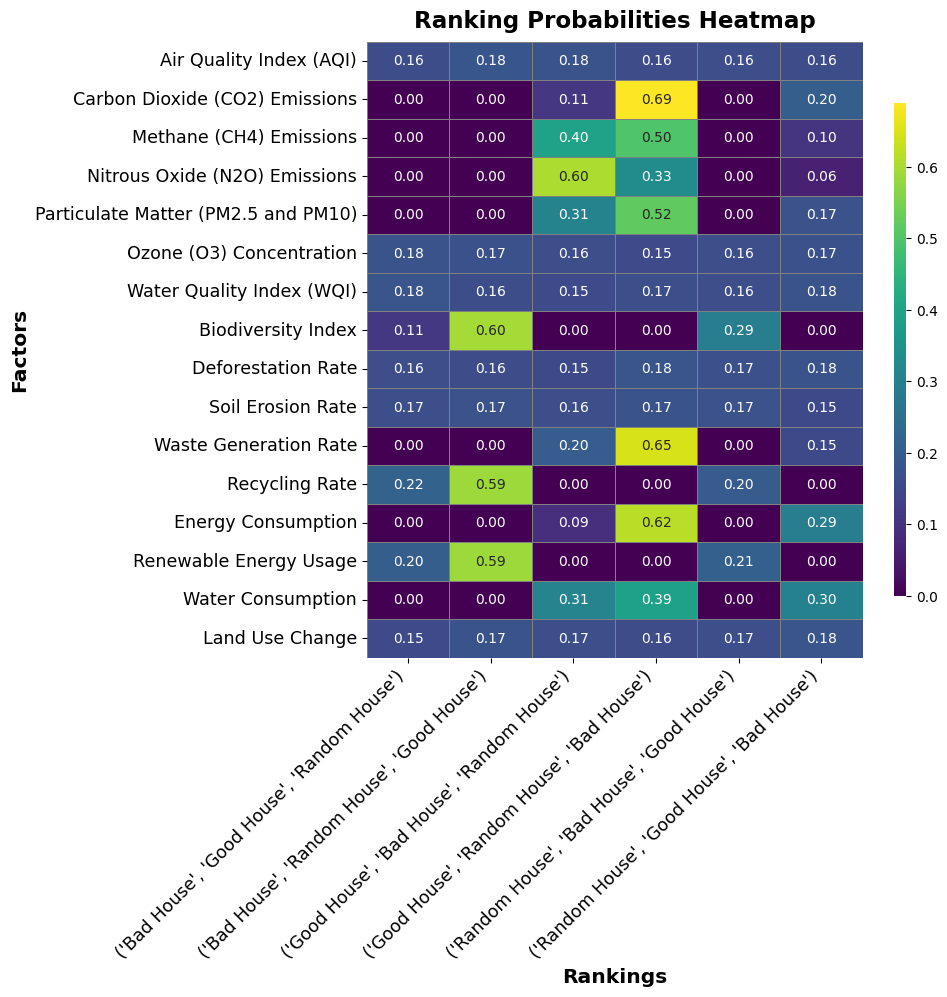

In [67]:
plot_ranking_probabilities_heatmap(RP_with_probabilities_and_names(houses, factors=environmental_indicators,matrix_names=house_labels),environmental_indicators)

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Tuple


def plot_ranking_probabilities_heatmap1(
    probabilities: Dict[str, Dict[Tuple[str], float]],
    factors: List[str],
    heatmap_theme: str = "viridis"
):
    """
    Plots a heatmap of ranking probabilities for each factor, with rankings on the y-axis.
    The heatmap ensures that all squares have the same dimensions while maintaining a professional style.

    Parameters:
    probabilities (Dict[str, Dict[Tuple[str], float]]): Ranking probabilities for each factor.
    factors (List[str]): List of factor names.
    heatmap_theme (str): Color palette for the heatmap. Default is "viridis".
    """
    # Prepare data for heatmap
    factor_names = list(factors)
    ranking_labels = sorted(
        {ranking for factor in factors for ranking in probabilities[factor]})

    # Format rankings as strings (e.g., "B < A < C")
    formatted_rankings = [" < ".join(ranking) for ranking in ranking_labels]

    # Create heatmap data
    heatmap_data = np.array([
        [probabilities[factor].get(ranking, 0) for ranking in ranking_labels]
        for factor in factors
    ])

    # Determine text and label sizes dynamically
    factor_count = len(factors)
    ranking_count = len(ranking_labels)

    # Set fixed dimensions for each square
    square_size = 0.8  # Size of each square in inches
    fig_width = factor_count * square_size  # Total width of the figure
    fig_height = ranking_count * square_size  # Total height of the figure

    # Adjust font sizes dynamically
    label_fontsize = max(
        8, 14 - 0.5 * np.log1p(max(factor_count, ranking_count)))
    annot_fontsize = max(
        6, 10 - 0.3 * np.log1p(max(factor_count, ranking_count)))

    # Plot the heatmap
    plt.figure(figsize=(fig_width, fig_height))
    ax = sns.heatmap(
        heatmap_data.T,  # Transpose to put rankings on the y-axis
        annot=True,
        fmt=".2f",
        cmap=heatmap_theme,
        xticklabels=factor_names,
        yticklabels=formatted_rankings,
        linewidths=0.5,  # Creates space between squares
        linecolor='gray',
        cbar_kws={"shrink": 0.8, "aspect": 40},  # Adjusts color bar size
        annot_kws={"size": annot_fontsize},  # Adjusts annotation font size
        square=True  # Ensures squares have equal dimensions
    )

    # Customize plot appearance
    plt.xticks(rotation=45, ha="right", fontsize=label_fontsize)
    plt.yticks(rotation=0, fontsize=label_fontsize)
    plt.xlabel("Factors", fontsize=label_fontsize + 2, fontweight='bold')
    plt.ylabel("Rankings", fontsize=label_fontsize + 2, fontweight='bold')
    plt.title("Ranking Probabilities Heatmap",
              fontsize=label_fontsize + 4, fontweight='bold', pad=20)

    # Add gridlines for better readability
    plt.grid(False)  # Disable default grid
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

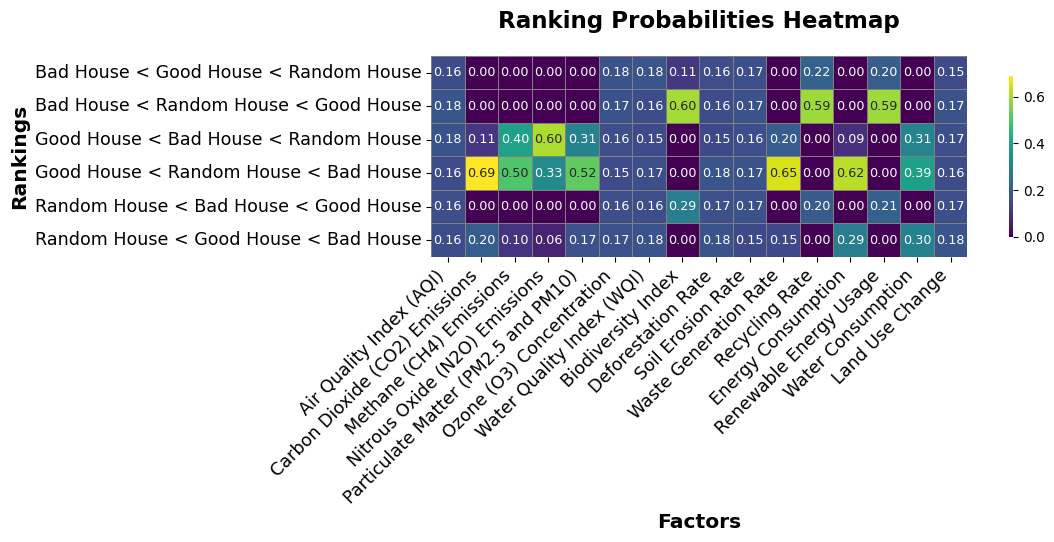

In [69]:
plot_ranking_probabilities_heatmap1(RP_with_probabilities_and_names(houses, factors=environmental_indicators, matrix_names=house_labels),environmental_indicators)

In [71]:
def plot_parallel_coordinates_summary(
    buildings: List[np.ndarray],
    environmental_indicators: List[str],
    house_labels: List[str],
    additional_lines = None,
    alpha: float = 0.8,
    linewidth: float = 2,
    grid_alpha: float = 0.5,
    title: str = "Parallel Coordinates Plot for Building Comparison (Mean Values)",
):
    """
    Plot a parallel coordinates plot using summary statistics (mean) for each building.
    
    :param buildings: List of NumPy arrays, where each array represents a building's environmental data.
                     Each array has shape (num_simulations, num_indicators).
    :param environmental_indicators: List of strings, where each string is the name of an environmental indicator.
    :param house_labels: List of strings, where each string is the label for a building.
    :param additional_lines: Optional string to specify additional lines to plot (e.g., "median", "quartiles").
    :param alpha: Transparency of the lines (float). Default is 0.8.
    :param linewidth: Width of the lines (float). Default is 2.
    :param grid_alpha: Transparency of the grid lines (float). Default is 0.5.
    :param title: Title of the plot (str). Default is "Parallel Coordinates Plot for Building Comparison (Mean Values)".
    """
    # Handle null values by replacing them with the column mean
    buildings = [np.where(np.isnan(building), np.nanmean(
        building, axis=0), building) for building in buildings]

    # Compute the mean of each indicator for each building
    building_means = [np.mean(building, axis=0) for building in buildings]

    # Combine data into a single DataFrame
    combined_data = pd.DataFrame(
        building_means, columns=environmental_indicators)
    combined_data["Building"] = house_labels

    # Add additional lines if specified
    if additional_lines == "median":
        building_medians = [np.median(building, axis=0)
                            for building in buildings]
        median_data = pd.DataFrame(
            building_medians, columns=environmental_indicators)
        median_data["Building"] = [
            f"{label} (Median)" for label in house_labels]
        combined_data = pd.concat([combined_data, median_data])

    elif additional_lines == "quartiles":
        building_q1 = [np.percentile(building, 25, axis=0)
                       for building in buildings]
        building_q3 = [np.percentile(building, 75, axis=0)
                       for building in buildings]
        q1_data = pd.DataFrame(building_q1, columns=environmental_indicators)
        q3_data = pd.DataFrame(building_q3, columns=environmental_indicators)
        q1_data["Building"] = [f"{label} (Q1)" for label in house_labels]
        q3_data["Building"] = [f"{label} (Q3)" for label in house_labels]
        combined_data = pd.concat([combined_data, q1_data, q3_data])

    # Plot parallel coordinates
    plt.figure(figsize=(14, 8))
    parallel_coordinates(combined_data, "Building",
                         color=plt.cm.tab20.colors, alpha=alpha, linewidth=linewidth)

    # Add grid lines
    plt.grid(alpha=grid_alpha)

    # Add title and labels
    plt.title(title, fontsize=16, pad=20)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel("Environmental Indicators", fontsize=14, labelpad=15)
    plt.ylabel("Value", fontsize=14, labelpad=15)

    # Add a legend
    plt.legend(loc="upper right", bbox_to_anchor=(1.15, 1.1), fontsize=12)

    # Show the plot
    plt.tight_layout()
    plt.show()




## *Heijungs superiority statistics*

In [72]:
def K4(mat1,mat2,lamb):
    def O(x):
        return 1 if x>0 else 0
    if mat1.shape != mat2.shape or len(mat1)==0:
        raise ValueError("Matrices should have the same dimensions & Matrices shouldn't be empty.")
    N,m= len(mat1), len(mat1[0])
    K= []
    for j in range(m):
        arr,sum = [],0
        for i in range(N):
            sum += O(mat1[i,j]/mat2[i,j] - (1+ lamb/100))
        arr.append(sum/N)
    K.append(arr)
    return K
                  

In [73]:
def K4(mat1: np.ndarray, mat2: np.ndarray, lamb: float) -> List[float]:
    """
    Calculate the K4 indicator for two matrices (buildings) across all environmental indicators.
    
    :param mat1: NumPy array of shape (num_simulations, num_indicators) for Building 1.
    :param mat2: NumPy array of shape (num_simulations, num_indicators) for Building 2.
    :param lamb: Threshold for significance (e.g., 5 for 5%).
    :return: List of K4 values for each environmental indicator.
    """
    # Input validation
    if mat1.shape != mat2.shape:
        raise ValueError("Matrices must have the same dimensions.")
    if len(mat1) == 0 or len(mat2) == 0:
        raise ValueError("Matrices must not be empty.")
    if not isinstance(lamb, (int, float)) or lamb < 0:
        raise ValueError("Lambda must be a non-negative number.")

    # Avoid division by zero by adding a small constant
    epsilon = 1e-10
    mat1 = mat1 + epsilon
    mat2 = mat2 + epsilon

    # Calculate the ratio of impacts
    ratio = mat1 / mat2

    # Apply the Heaviside step function
    k4_values = np.mean(ratio > (1 + lamb / 100), axis=0)

    return k4_values.tolist()

In [74]:
K4(houses[0],houses[1],5)

[0.473,
 1.0,
 1.0,
 1.0,
 1.0,
 0.461,
 0.475,
 0.0,
 0.482,
 0.468,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.474]

In [75]:

def plot_K4_histogram(mat1: np.ndarray, mat2: np.ndarray, lamb: float, indicator_names: List[str]):
    """
    Plot a histogram of K4 values for two matrices (buildings) across environmental indicators.
    
    :param mat1: NumPy array of shape (num_simulations, num_indicators) for Building 1.
    :param mat2: NumPy array of shape (num_simulations, num_indicators) for Building 2.
    :param lamb: Threshold for significance (e.g., 5 for 5%).
    :param indicator_names: List of names for the environmental indicators.
    """
    # Calculate K4 values
    k4_values = K4(mat1, mat2, lamb)

    # Normalize K4 values to the range [-1, 1]
    normalized_k4 = np.array(k4_values) * 2 - 1  # Scale to [-1, 1]

    # Create the plot
    plt.figure(figsize=(12, 6))

    # Plot the histogram
    plt.bar(indicator_names, normalized_k4, color=np.where(
        normalized_k4 < 0, 'red', 'blue'))

    # Add labels and title
    plt.xlabel('Environmental Indicators')
    plt.ylabel('Performance (A vs B)')
    plt.title(f'K4 Performance Comparison (λ = {lamb}%)')

    # Add a horizontal line at y=0 for reference
    plt.axhline(0, color='black', linestyle='--', linewidth=1)

    # Add annotations for better interpretation
    for i, val in enumerate(normalized_k4):
        if val < 0:
            plt.text(
                i, val - 0.05, f'B better by {abs(val):.2f}', ha='center', va='top', color='red')
        else:
            plt.text(
                i, val + 0.05, f'A better by {val:.2f}', ha='center', va='bottom', color='blue')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Add grid for better visualization
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Show the plot
    plt.tight_layout()
    plt.show()

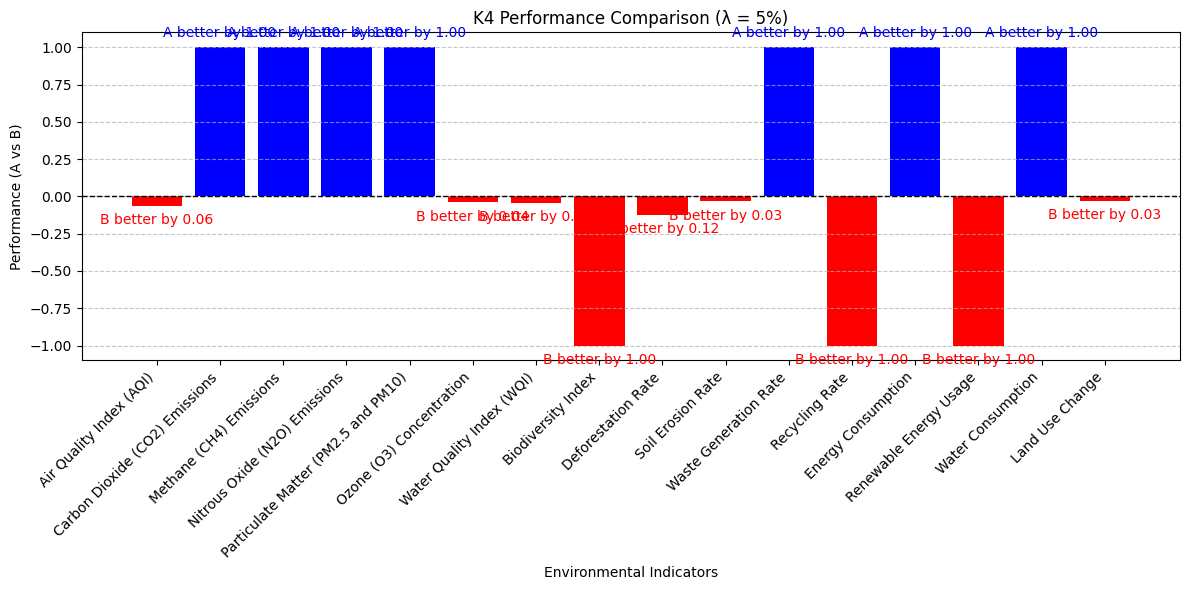

In [ ]:
plot_K4_histogram(houses[0],houses[1],5,environmental_indicators)

In [76]:
import numpy as np
import pandas as pd
import plotly.express as px
from typing import List


def plot_K4_combined_interactive(
    mat1: np.ndarray,
    mat2: np.ndarray,
    lamb: float,
    indicator_names: List[str],
    mat1_name: str = "Building A",
    mat2_name: str = "Building B",
    percentages: List[float] = [5, 10, 20]
):
    """
    Plot an interactive histogram of K4 values using Plotly, combining all percentages into one plot.
    Different percentages are differentiated by shades of color.
    
    :param mat1: NumPy array of shape (num_simulations, num_indicators) for Building 1.
    :param mat2: NumPy array of shape (num_simulations, num_indicators) for Building 2.
    :param lamb: Threshold for significance (e.g., 5 for 5%).
    :param indicator_names: List of names for the environmental indicators.
    :param mat1_name: Name of the first matrix (e.g., "Building A").
    :param mat2_name: Name of the second matrix (e.g., "Building B").
    :param percentages: List of percentages to compare (e.g., [5, 10, 20]).
    """
    # Calculate K4 values for each percentage
    k4_results = []
    for p in percentages:
        k4_values = K4(mat1, mat2, p)
        normalized_k4 = np.array(k4_values) * 2 - 1  # Scale to [-1, 1]
        k4_results.append(normalized_k4)

    # Create a DataFrame for Plotly
    data = []
    for i, p in enumerate(percentages):
        for j, indicator in enumerate(indicator_names):
            data.append({
                'Indicator': indicator,
                'Performance': k4_results[i][j],
                'Percentage': f'{p}%',
                'Color': 'Red' if k4_results[i][j] < 0 else 'Blue'
            })

    df = pd.DataFrame(data)

    # Define a gradient of warm colors for each percentage
    color_map = {
        '5%': '#1f77b4',  # Lightest blue
        '10%': '#2ca02c',  # Medium blue
        '20%': '#9467bd',  # Darkest blue
    }

    # Create the interactive plot
    fig = px.bar(
        df,
        x='Indicator',
        y='Performance',
        color='Percentage',
        barmode='group',  # Group bars for each indicator
        title=f'K4 Performance Comparison: {mat1_name} (Blue) vs {mat2_name} (Red)',
        labels={
            'Performance': f'Performance ({mat1_name} vs {mat2_name})',
            'Indicator': 'Environmental Indicators'
        },
        color_discrete_map=color_map,
        category_orders={'Percentage': [
            f'{p}%' for p in percentages]}  # Order bars
    )

    # Update layout for professional styling
    fig.update_layout(
        font_family="Arial",
        font_size=12,
        title_font_size=16,
        title_x=0.5,
        xaxis_title_font_size=14,
        yaxis_title_font_size=14,
        legend_title_font_size=14,
        plot_bgcolor='rgba(255, 255, 255, 0.9)',  # Light background
        paper_bgcolor='rgba(255, 255, 255, 0.9)',  # Light background
        margin=dict(l=50, r=50, t=80, b=50),
        showlegend=True,
        legend_title_text='Percentage Threshold'
    )

    # Add spacing between bars
    fig.update_traces(marker_line_width=1.5,
                      marker_line_color='white', width=0.6)

    # Add a horizontal line at y=0 for reference
    fig.add_hline(y=0, line_dash="dash", line_color="black")

    # Show the plot
    fig.show()

In [ ]:
plot_K4_combined_interactive(houses[0],houses[1],percentages=[5,12],mat1_name="Bad",mat2_name="Good",indicator_names=environmental_indicators,lamb=5)

# PCA 

In [85]:
def Houses_PCA(houses, nb_components=1):
    for i, matrix in enumerate(houses):
        # Center data (PCA assumes centered data)
        matrix_centered = matrix - np.mean(matrix, axis=0)
        # Apply PCA
        pca = PCA(n_components=nb_components)
        reduced =pca.fit_transform(matrix_centered)

        house_rep = np.mean(reduced)

    return reduced, house_rep

In [89]:
np.mean(Houses_PCA(houses, nb_components=1)[0])

np.float64(0.0)